In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## Función objetivo por gradiente descendente clásico


- Ejemplo de hipótesis: regresión lineal 
\begin{equation*}
y=h(\mathbf{x}; \boldsymbol{\theta})= h_{\boldsymbol{\theta}}(\mathbf{x})= \theta_0+\theta_1x_1+\cdots + \theta_n x_n
\end{equation*}


- Convención para simplificar notación: $x_0={1}$
\begin{equation*}
y=h(\mathbf{x}; \boldsymbol{\theta})= h_{\boldsymbol{\theta}}(\mathbf{x})= \theta_0x_0+\theta_1x_1+\cdots + \theta_n x_n=\sum_{i=0}^{n}{\theta_{i}x_{i}}
\end{equation*} 
\begin{equation*}
=\boldsymbol{\theta}^T  \mathbf{x}= \langle \boldsymbol{\theta},  \mathbf{x} \rangle= \boldsymbol{\theta} \cdot{}  \mathbf{x}
\end{equation*}
\begin{equation*}
\boldsymbol{\theta} = [\theta_{0},\theta_{1}, \ldots ,\theta_{n}]^T
\end{equation*}  
\begin{equation*}
\boldsymbol{x} = [x_{0},x_{1}, \ldots ,x_{n}]^T
\end{equation*}  


- Para encontrar $\boldsymbol{\theta}$ minimizamos la función de error $J(\boldsymbol{\theta})$ con 
\begin{equation*}
J(\boldsymbol{\theta}) = \frac{1}{2} \sum_{i=1}^{m} ( h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)})- y^{(i)} )^2
\end{equation*}

\begin{equation*}
 \boldsymbol{\theta}^{*}= \arg\min_{\boldsymbol{\theta}} \boldsymbol{\theta}
\end{equation*}
Objetivo:
Se buscan parámetros $\boldsymbol{\theta}$ que producen el menor valor de $\boldsymbol{\theta}$

- Para el caso de dos parametros una caraterística
\begin{equation*}
J(\theta_0,\theta_1) = \frac{1}{2}  \sum_{i=1}^{m}  ( \theta_0+\theta_1 x_{1}^{(i)} - y^{(i)} )^2
\end{equation*}  

### Algoritmo de gradiente descendente  

1.- Tome un valor $\boldsymbol{\theta}^{(0)}$ inicial, t=0

2.- Calcule en   $\boldsymbol{\theta}^{(t)}$ el gradiente (máxima dirección de cambio)
\begin{equation*}
\nabla_{\boldsymbol{\theta}}  J(\boldsymbol{\theta}^{(t)})= \left[ \frac{\partial J}{\partial \theta_{0}}  \frac{\partial J}{\partial \theta_{1}}  \cdots \frac{\partial J}{\partial \theta_{0}} \right]^{T} 
\end{equation*}
3.- Calcule la nueva posición 
\begin{equation*}
{\boldsymbol{\theta}}^{(t+1)}:= {\boldsymbol{\theta}}^{(t)}- \alpha \nabla_{\boldsymbol{\theta}}  J(\boldsymbol{\theta}^{(t)})
\end{equation*}
o de forma equivalente para cada $\theta_{j}, j\in 1, \ldots ,n$
\begin{equation*}
\theta_{j}^{(t+1)}:=\theta_{j}^{(t)}- \alpha \frac{\partial J({\boldsymbol{\theta}}^{(t)})}{\partial \theta_j}
\end{equation*}



### Gradiente de la función de costo
La función de costo multivariable esta dada por 
 \begin{equation*}
 J(\theta_0,\theta_1, \theta_2, \ldots)= \frac{1}{2} \sum_{i=1}^{m}(\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)})^2
\end{equation*}
el gradiente se obtiene fácilmente

   \begin{align}
    \nabla_\theta J(\boldsymbol{\theta}) &= \begin{bmatrix}
            \frac{\partial J({\boldsymbol{\theta}})}{\partial \theta_0} \\
           \frac{\partial J({\boldsymbol{\theta}})}{\partial \theta_1} \\
           \frac{\partial J({\boldsymbol{\theta}})}{\partial \theta_2} \\
           \vdots  \\
           \frac{\partial J({\boldsymbol{\theta}})}{\partial \theta_n}
         \end{bmatrix}
  \end{align}
  
  
 \begin{align}
    \nabla_\theta J(\boldsymbol{\theta}) &= \begin{bmatrix}
            \sum_{i=1}^{m} (\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)}) \cdot 1 \\
           \sum_{i=1}^{m} (\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)}) \cdot x_1^{(i)}\\
           \sum_{i=1}^{m} (\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)}) \cdot x_2^{(i)}\\
           \vdots  \\
           \sum_{i=1}^{m} (\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)}) \cdot x_n^{(i)}
         \end{bmatrix}
  \end{align}

gradiente en notación vectorial

 \begin{equation*}
\nabla_\theta J(\boldsymbol{\theta}) = \sum_{i=1}^{m}(\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}-y^{(i)}) \cdot \boldsymbol{x}^{(i)}
\end{equation*}


### Algoritmo de gradiente descendente 

### Ejemplo bidimensional del Algoritmo de gradiente descendente  

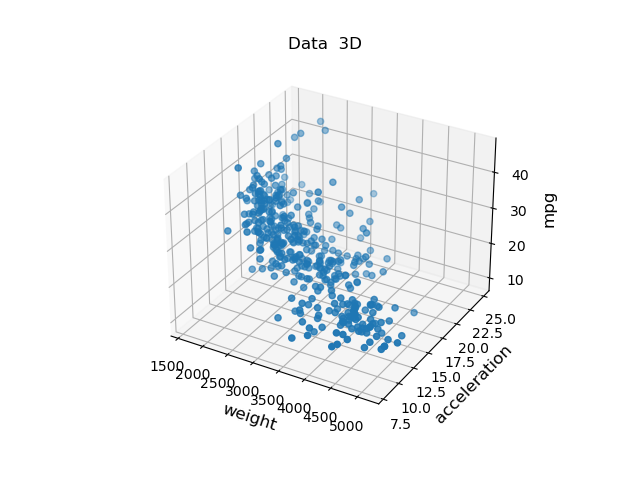

In [2]:
%matplotlib widget

dataset = pd.read_csv('auto-mpg.csv')
vary=0
var1=4
var2=5

x1 = dataset.iloc[:, var1].values #Feature matrix
x2 = dataset.iloc[:, var2].values #Criterion Matrix 
y = dataset.iloc[:, vary].values #Criterion Matrix 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x1,x2,y)
plt.title("Data  3D ")


ax.set_xlabel(dataset.columns[var1], fontsize=12);
ax.set_ylabel(dataset.columns[var2], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);

theta_0=23.514573, theta_1=-6.204321, theta_2=0.690803, Cost=7317.984101, iterations: 3999


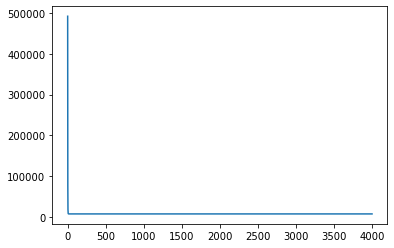

In [6]:
# Parameter initialization
%matplotlib inline
theta = np.array([[-10],[-10],[-10]])
ep=1e-8
lr =0.001
n_iter = 4000
j_cost_GD= np.zeros([n_iter])

# Dataset shape
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x1),1)),x1,x2]

#Standardization using z-score
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std
    
#Gradient Descent algorithm 
for it in range(n_iter):
    prediction = np.dot(x_bs,theta)
    residual=prediction - y
    si=-lr*(x_bs.T.dot(residual))
    theta = theta + si
    j_cost_GD[it]=np.sum(np.square(residual))
    # if j_cost_GD[it]<7318: 
    #     break;
print("theta_0=%f, theta_1=%f, theta_2=%f, Cost=%f, iterations: %d" %(theta[0],theta[1],theta[2],j_cost_GD[it],it))
fig = plt.figure()
plt.plot(j_cost_GD[0:it])
plt.show()

(209, 305)
(209, 305)
(209, 305)


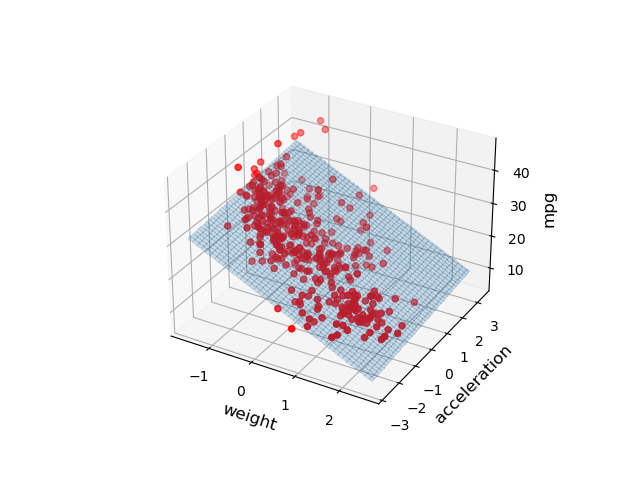

In [4]:
##Plane result 
%matplotlib widget
xx1 = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.02)
xx2 = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.02)
plane=np.zeros([len(xx1),len(xx2)])

for i in range(len(xx1)):
    for j in range(len(xx2)):
        plane[i,j]=np.dot(np.c_[1,xx1[i],xx2[j]],theta)
X1, X2 = np.meshgrid(xx1, xx2, indexing = 'ij')
print(X1.shape)
print(X2.shape)
print(plane.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1,X2, plane,
                       linewidth=0, antialiased=False,alpha=0.2)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel(dataset.columns[var1], fontsize=12);
ax.set_ylabel(dataset.columns[var2], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);


